<a href="https://colab.research.google.com/github/chelseiji/Data2000HW/blob/main/11_14_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Image Classification: Fashion MNIST

The Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems. Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

The dataset contains 70,000 28x28 grayscale images of fashion products from 10 categories from a dataset of Zalando article images, with 7,000 images per category. The training set consists of 60,000 images and the test set consists of 10,000 images. The dataset is commonly included in standard machine learning libraries. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Fashion_MNIST))

The classes are:

| Label | Description |
|-----|-----|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## Objective

The goal here is to simply build and fit the best convolutional neural network that you can to correctly classify these image instances. Describe your process and choices as you go, and include an evaluation of your model's performance.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


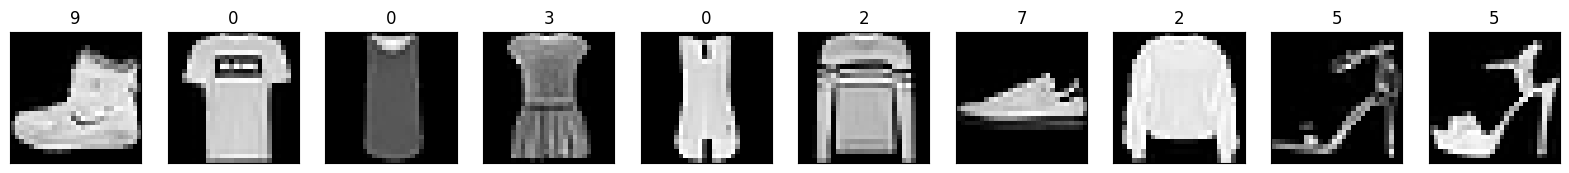

In [3]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'{y_train[i]}')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [4]:
img_input = tf.keras.layers.Input(shape = (28,28,1))

In [5]:
conv1 = layers.Conv2D(7,2,activation = 'relu')(img_input) #0 for negative, to infinity for positive
pooling = layers.AveragePooling2D(2)(conv1) #takes avg value of pool, the
#dimension is the shape of your data, what are you trying to model?
#4 is the window length
#stride=1 as the default
dropout=tf.keras.layers.Dropout(0.4)(pooling)
#40% of neurons will be set to 0(randomly)60% are active
flatten=tf.keras.layers.Flatten()(dropout)

dense=layers.Dense(100 ,activation ='relu')(flatten)

output = layers.Dense(10, activation='softmax')(dense)

In [6]:
model = tf.keras.Model(img_input, output)

In [7]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = ['acc']
)

Next, we'll configure the specifications for model training. We will train our model with the sparce_categorical_crossentrophy loss so thaqt the labels are represnted as a single index value and not hot one encoded. We will use the rmsprop optimizer in keras

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 7)         35        
                                                                 
 average_pooling2d (Average  (None, 13, 13, 7)         0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 13, 13, 7)         0         
                                                                 
 flatten (Flatten)           (None, 1183)              0         
                                                                 
 dense (Dense)               (None, 100)               118400    
                                                             

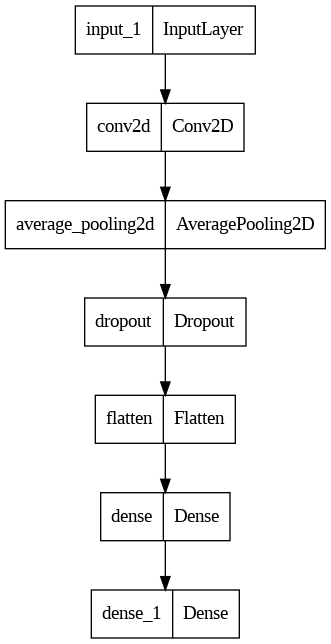

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model)

The shaape of this plot model shows how the size of your feature map evolves in each successive layer

In [ ]:
history = model.fit(X_train,y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 33s 16ms/step - loss: 0.5833 - acc: 0.7890 - val_loss: 0.4541 - val_acc: 0.8350
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4220 - acc: 0.8468 - val_loss: 0.3910 - val_acc: 0.8544
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3766 - acc: 0.8639 - val_loss: 0.3542 - val_acc: 0.8746
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3539 - acc: 0.8704 - val_loss: 0.3348 - val_acc: 0.8800
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3388 - acc: 0.8774 - val_loss: 0.3176 - val_acc: 0.8844
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3313 - acc: 0.8805 - val_loss: 0.3177 - val_acc: 0.8841
Epoch 7/15
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3230 - acc: 0.8845 - val_loss: 0.3017 - val_acc: 0.8918
Epoch 8/15
1875/1875 [==========================

Here we begin to train the model. I used a batch size of 32 as it is often used as a defaiult batch size. I used a epoch of  15 since it is a bit large.

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test)

This then is where I evalueate the model where loss is 0.3413 and is a measure of how well the model fits the data. The accuracy is 0.8798 which a measure of how often the model predicts the correct label since it is greater than 70% we can say that this is a well performing model.



Text(0.5, 1.0, 'Training and validation loss')

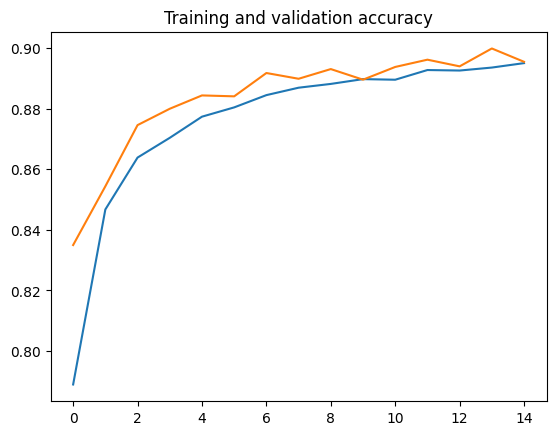

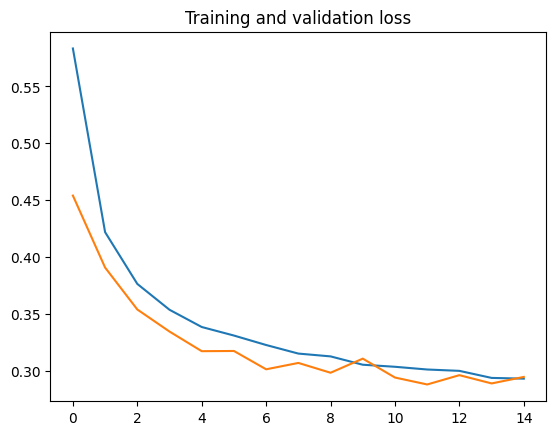

In [13]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As we see our traing accuracy in the blue and our validation accuracy are very closely tied at around almost 90%. They steadily increase to this 90% then plataue a bit. Our traing and validation losses are opposite of this in whcih they both then to decrease then platau at a lower epoch of 3. We have a fairly large set of data consiting of about 70,000 greyscale images. In this example we do not see over fitting